```ipython3
python3 -m pip install -e git+https://github.com/huiwengoh/crowd-kit.git#egg=crowd-kit 
python3 -m pip install -e git+https://github.com/huiwengoh/cleanlab.git@multiannotator-benchmark#egg=cleanlab 
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cleanlab.multiannotator import get_label_quality_multiannotator, get_improved_consensus_label
from utils.benchmark_functions import benchmark_results

import warnings
warnings.filterwarnings("ignore")

In [2]:
!wget -nc "https://cleanlab-public.s3.amazonaws.com/Multiannotator/cifar-10h/benchmark_data.tar.gz" 
!tar -xf benchmark_data.tar.gz benchmark_data/
!mkdir benchmark_results

--2022-08-30 21:14:05--  https://cleanlab-public.s3.amazonaws.com/Multiannotator/cifar-10h/benchmark_data.tar.gz
Resolving cleanlab-public.s3.amazonaws.com (cleanlab-public.s3.amazonaws.com)... 52.216.165.195
Connecting to cleanlab-public.s3.amazonaws.com (cleanlab-public.s3.amazonaws.com)|52.216.165.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9547378 (9.1M) [application/x-gzip]
Saving to: ‘benchmark_data.tar.gz’

benchmark_data.tar. 100%[===================>]   9.10M   570KB/s    in 18s     

2022-08-30 21:14:23 (529 KB/s) - ‘benchmark_data.tar.gz’ saved [9547378/9547378]



In [3]:
def load_data(dataset, model):
    multiannotator_labels = np.load(f"benchmark_data/{dataset}/{model}/annotator_labels.npy")
    true_labels = np.load(f"benchmark_data/{dataset}/{model}/true_labels.npy")
    pred_probs = np.load(f"benchmark_data/{dataset}/{model}/pred_probs.npy")
    
    return multiannotator_labels, true_labels, pred_probs

In [4]:
methods = [
    ("majority", "crowdlab"),
    ("majority", "label_quality_score"),
    ("majority", "agreement"),
    ("majority", "active_label_cleaning"),
    ("majority", "empirical_bayes"),
    ("majority", "no_perannotator_weights"),
    ("dawid_skene", "dawid_skene"),
    ("glad", "glad"),
]

model_methods = [
    ("dawid_skene", "dawid_skene"),
    ("glad", "glad"),
]

In [5]:
model_names = ["resnet18", "swin", "truelabels"]

## Worst Annotators Dataset

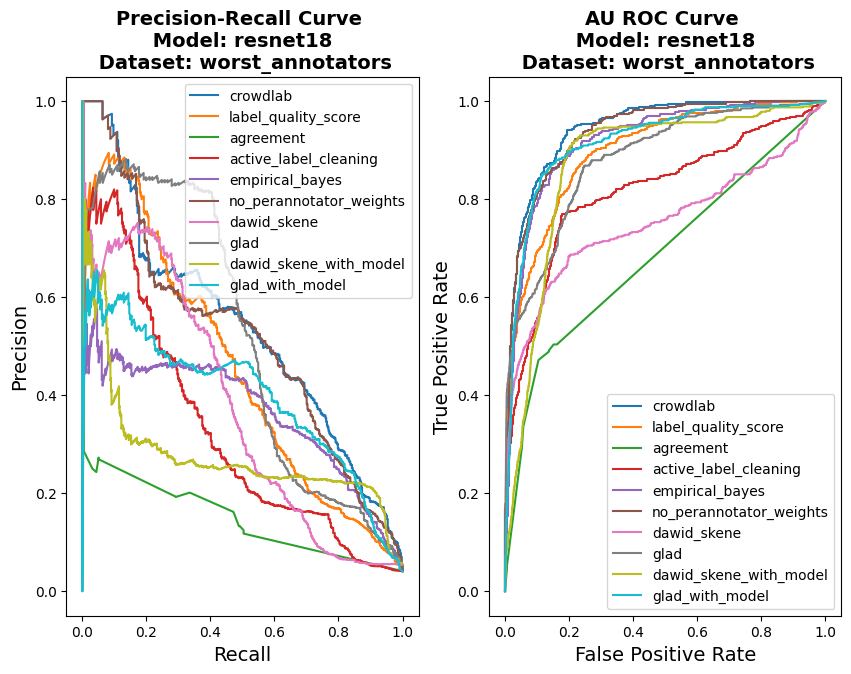

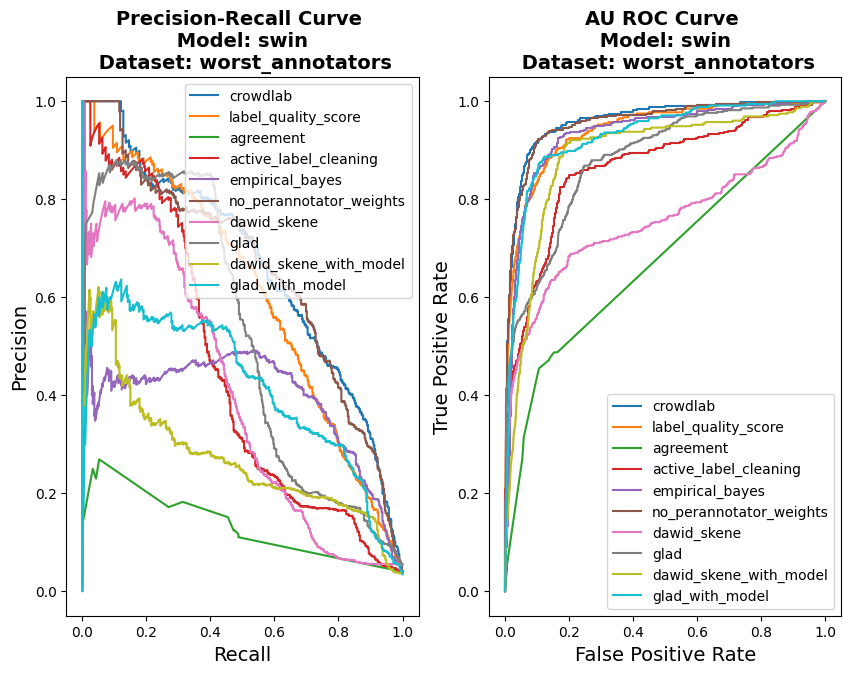

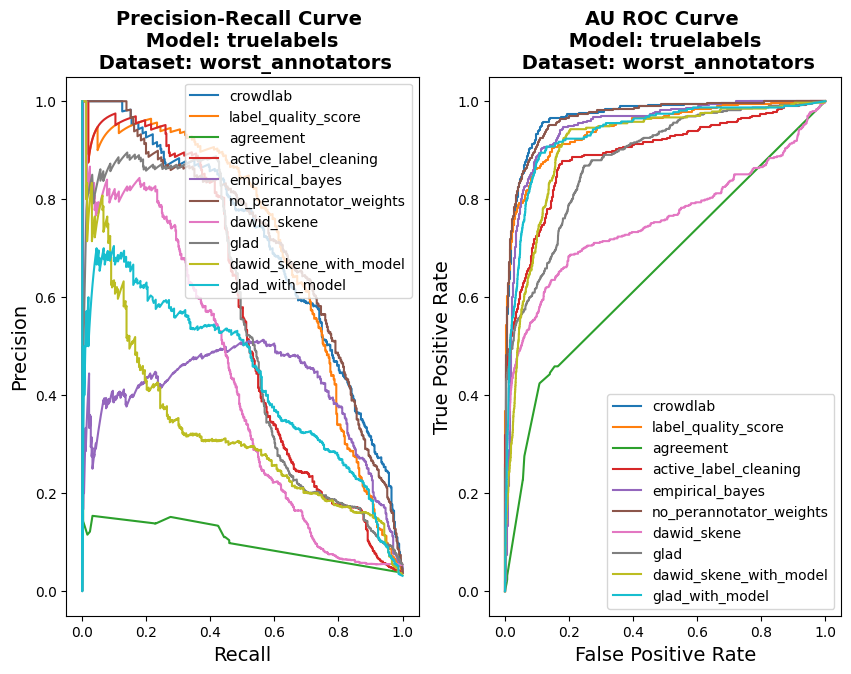

<Figure size 1000x700 with 0 Axes>

In [6]:
dataset = "worst_annotators"
results_worst_list = []

for i in range(len(model_names)):
    model = model_names[i]

    # base benchmark
    multiannotator_labels, true_labels, pred_probs = load_data(dataset, model)
    results = benchmark_results(multiannotator_labels, true_labels, pred_probs, methods, model, dataset)
    results_worst_list.append(pd.DataFrame(results))

    # adding model as annotator
    model_labels = np.argmax(pred_probs, axis = 1)
    multiannotator_labels_model = pd.DataFrame(multiannotator_labels)
    multiannotator_labels_model[99999] = model_labels

    results_model = benchmark_results(multiannotator_labels_model, true_labels, pred_probs, model_methods, model, dataset, add_model=True)
    results_worst_list.append(pd.DataFrame(results_model))

    # getting improved consensus label
    improved_consensus_label = get_improved_consensus_label(
        multiannotator_labels,
        pred_probs
    )
    improved_accuracy = np.mean(true_labels == improved_consensus_label)

    results_worst_list.append(
                pd.DataFrame([{
                    "dataset": dataset,
                    "model": model,
                    "consensus_method": "crowdlab",
                    "consensus_labels_accuracy": improved_accuracy,
                }])
            )

    plt.figure()

In [7]:
results_worst = pd.concat(results_worst_list, ignore_index=True)
results_worst

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,worst_annotators,resnet18,majority,crowdlab,0.944892,0.537975,0.9589,0.720472,24.330900,22.384428,17.761557,14.274128,11.824818,7.761557
1,worst_annotators,resnet18,majority,label_quality_score,0.898247,0.448911,0.9589,0.515931,19.464720,21.411192,19.221411,13.381995,10.218978,6.496350
2,worst_annotators,resnet18,majority,agreement,0.686879,0.147983,0.9589,0.688119,4.866180,5.839416,6.326034,5.271695,4.720195,4.282238
3,worst_annotators,resnet18,majority,active_label_cleaning,0.816071,0.325016,0.9589,0.319592,17.031630,19.951338,16.301703,10.218978,7.883212,5.158151
4,worst_annotators,resnet18,majority,empirical_bayes,0.919592,0.365623,0.9589,0.596159,12.165450,12.165450,11.678832,11.111111,10.267640,7.299270
5,worst_annotators,resnet18,majority,no_perannotator_weights,0.937207,0.520520,0.9589,0.708251,24.330900,21.897810,18.248175,13.949716,11.922141,7.542579
6,worst_annotators,resnet18,dawid_skene,dawid_skene,0.752892,0.373237,0.9457,0.596159,12.891344,11.786372,13.259669,10.742787,8.508287,5.138122
7,worst_annotators,resnet18,glad,glad,0.881579,0.512185,0.9452,0.647907,14.598540,15.693431,15.875912,13.929440,9.963504,5.912409
8,worst_annotators,resnet18,dawid_skene_with_model,dawid_skene_with_model,0.873320,0.277819,0.9442,0.664029,12.544803,11.469534,8.602151,5.555556,5.089606,4.551971
9,worst_annotators,resnet18,glad_with_model,glad_with_model,0.918314,0.394088,0.9591,0.691331,14.669927,13.691932,14.425428,11.246944,10.806846,7.408313


In [8]:
pd.DataFrame(results_worst).to_csv("benchmark_results/results_worst.csv", index=False)

## Uniform 1-5 Annotations Dataset

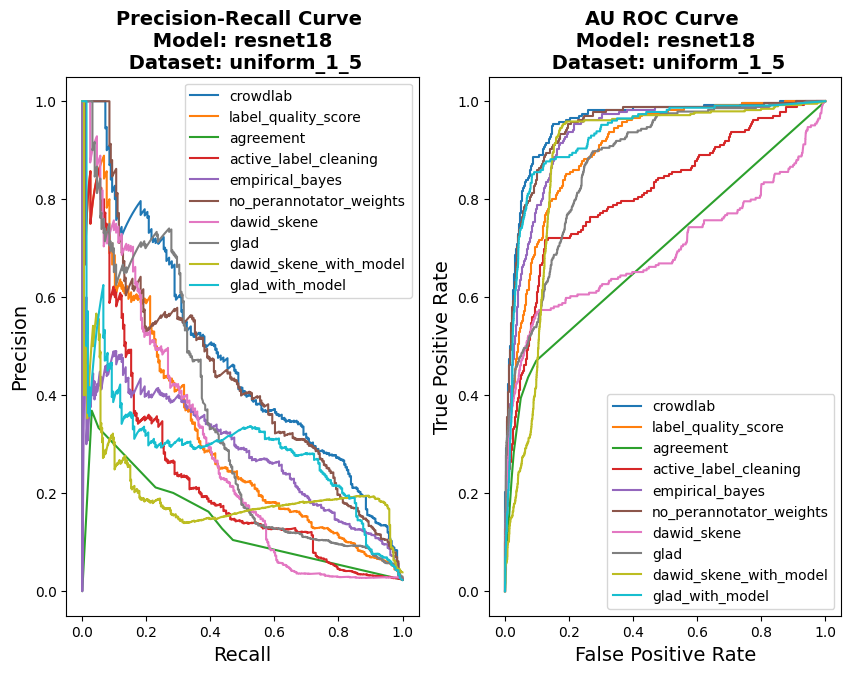

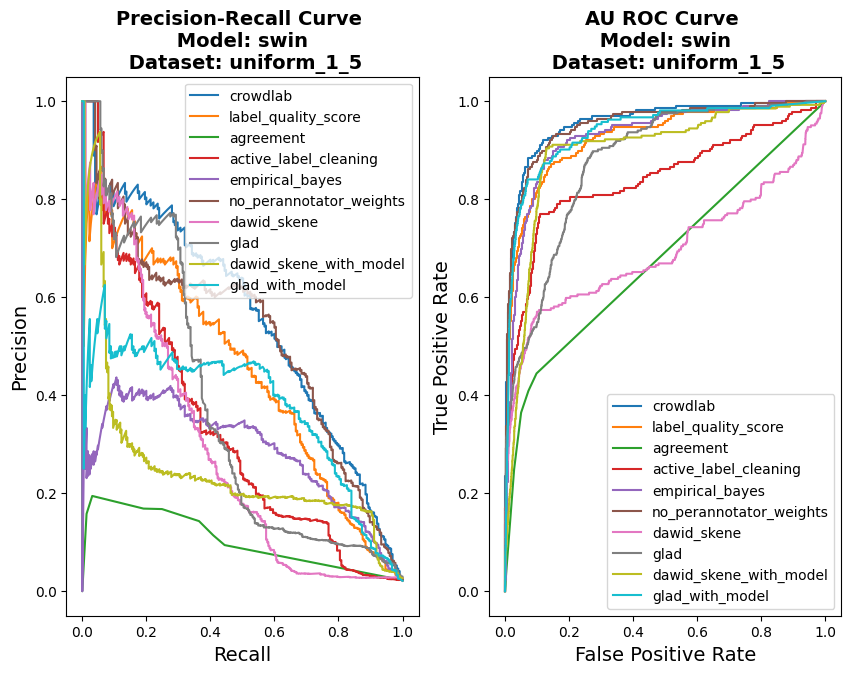

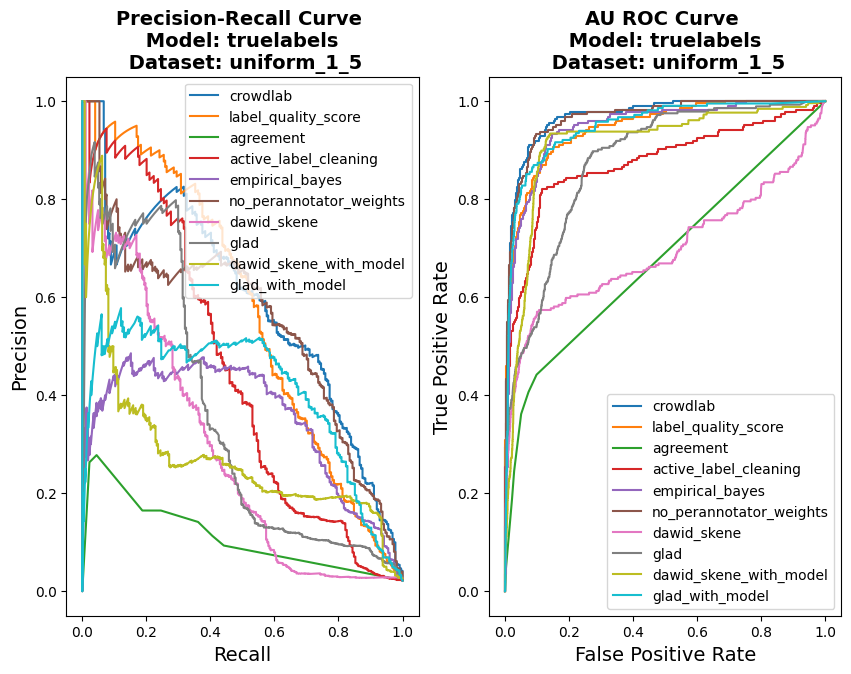

<Figure size 1000x700 with 0 Axes>

In [9]:
dataset = "uniform_1_5"
results_uniform_list = []

for i in range(len(model_names)):
    model = model_names[i]

    # base benchmark
    multiannotator_labels, true_labels, pred_probs = load_data(dataset, model)
    results = benchmark_results(multiannotator_labels, true_labels, pred_probs, methods, model, dataset)
    results_uniform_list.append(pd.DataFrame(results))

    # adding model as annotator
    model_labels = np.argmax(pred_probs, axis = 1)
    multiannotator_labels_model = pd.DataFrame(multiannotator_labels)
    multiannotator_labels_model[99999] = model_labels

    results_model = benchmark_results(multiannotator_labels_model, true_labels, pred_probs, model_methods, model, dataset, add_model=True)
    results_uniform_list.append(pd.DataFrame(results_model))

    # getting improved consensus label
    improved_consensus_label = get_improved_consensus_label(
        multiannotator_labels,
        pred_probs
    )
    improved_accuracy = np.mean(true_labels == improved_consensus_label)

    results_uniform_list.append(
                pd.DataFrame([{
                    "dataset": dataset,
                    "model": model,
                    "consensus_method": "crowdlab",
                    "consensus_labels_accuracy": improved_accuracy,
                }])
            )

    plt.figure()

In [10]:
results_uniform = pd.concat(results_uniform_list, ignore_index=True)
results_uniform

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,uniform_1_5,resnet18,majority,crowdlab,0.955228,0.477133,0.9764,0.825095,42.372881,33.050847,27.966102,16.949153,13.813559,8.644068
1,uniform_1_5,resnet18,majority,label_quality_score,0.905568,0.313491,0.9764,0.476141,33.898305,26.271186,22.457627,12.429379,9.745763,6.779661
2,uniform_1_5,resnet18,majority,agreement,0.696294,0.136764,0.9764,0.823396,21.186441,11.864407,9.745763,9.039548,7.118644,4.618644
3,uniform_1_5,resnet18,majority,active_label_cleaning,0.813913,0.232223,0.9764,0.353880,33.898305,24.576271,16.101695,10.028249,7.881356,5.593220
4,uniform_1_5,resnet18,majority,empirical_bayes,0.930503,0.281953,0.9764,0.763823,12.711864,20.338983,18.220339,13.983051,11.440678,7.457627
5,uniform_1_5,resnet18,majority,no_perannotator_weights,0.947245,0.439249,0.9764,0.796914,42.372881,27.118644,23.305085,17.090395,13.220339,8.093220
6,uniform_1_5,resnet18,dawid_skene,dawid_skene,0.695250,0.286140,0.9716,0.763823,31.690141,24.647887,19.014085,12.089202,8.521127,5.457746
7,uniform_1_5,resnet18,glad,glad,0.878161,0.350627,0.9716,0.762542,31.690141,22.535211,25.704225,13.028169,9.225352,5.316901
8,uniform_1_5,resnet18,dawid_skene_with_model,dawid_skene_with_model,0.886497,0.199592,0.9613,0.753465,10.335917,11.369509,7.235142,5.426357,4.857881,3.772610
9,uniform_1_5,resnet18,glad_with_model,glad_with_model,0.931200,0.290998,0.9772,0.789293,17.543860,18.421053,15.789474,13.011696,12.719298,8.333333


In [11]:
pd.DataFrame(results_uniform).to_csv("benchmark_results/results_uniform.csv", index=False)

## Complete Dataset

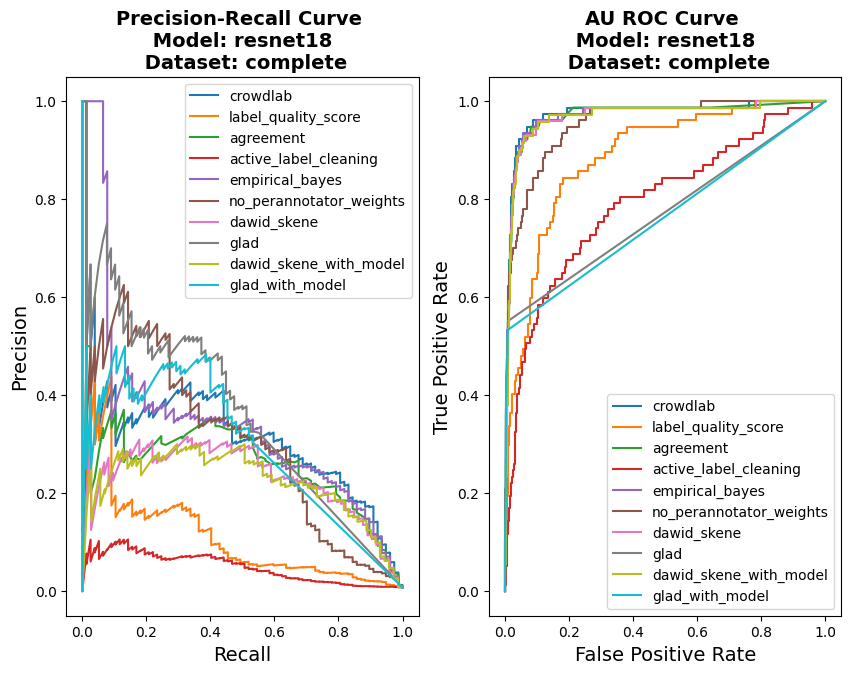

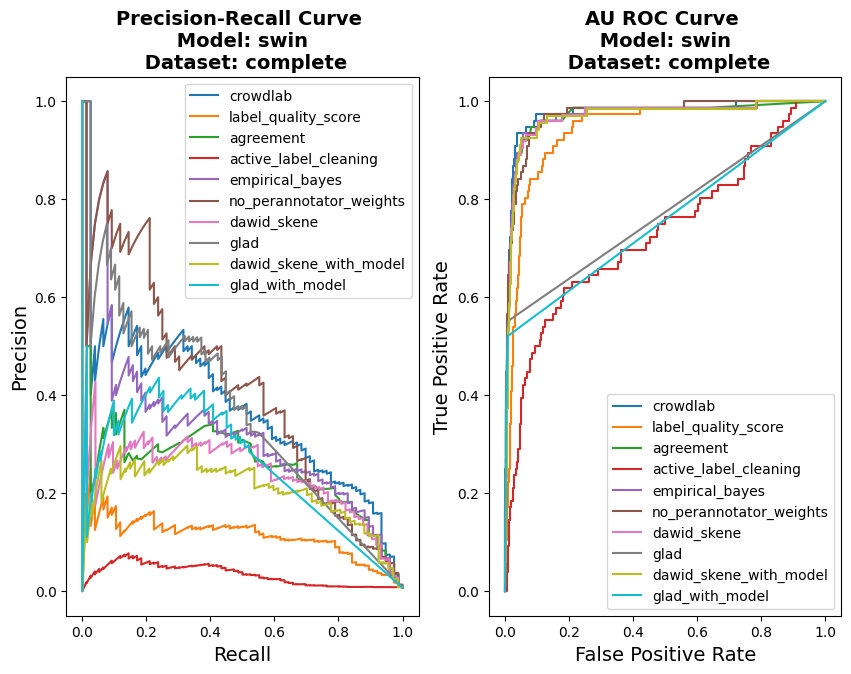

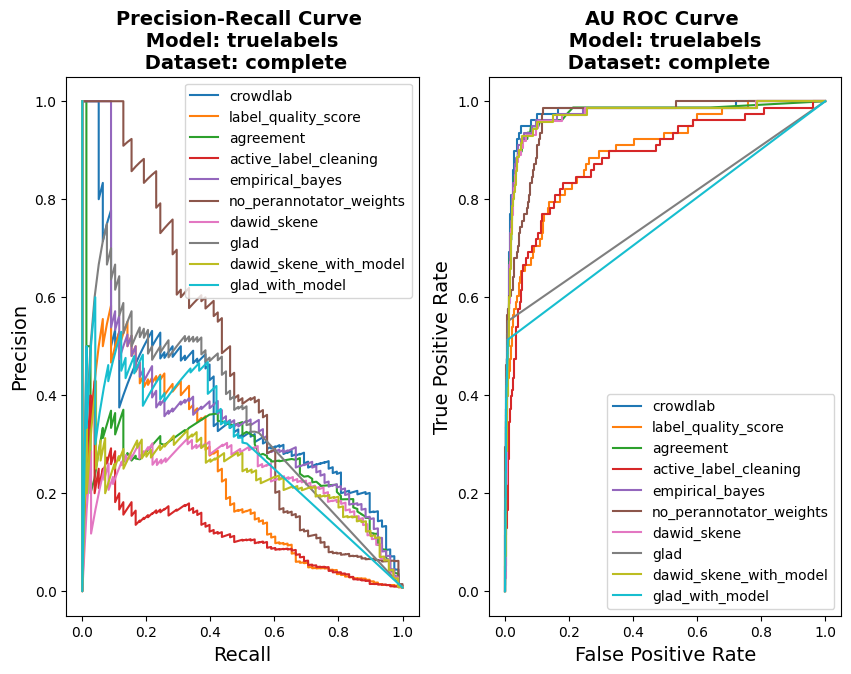

<Figure size 1000x700 with 0 Axes>

In [12]:
dataset = "complete"
results_complete_list = []

for i in range(len(model_names)):
    model = model_names[i]

    # base benchmark
    multiannotator_labels, true_labels, pred_probs = load_data(dataset, model)
    results = benchmark_results(multiannotator_labels, true_labels, pred_probs, methods, model, dataset)
    results_complete_list.append(pd.DataFrame(results))

    # adding model as annotator
    model_labels = np.argmax(pred_probs, axis = 1)
    multiannotator_labels_model = pd.DataFrame(multiannotator_labels)
    multiannotator_labels_model[99999] = model_labels

    results_model = benchmark_results(multiannotator_labels_model, true_labels, pred_probs, model_methods, model, dataset, add_model=True)
    results_complete_list.append(pd.DataFrame(results_model))

    # getting improved consensus label
    improved_consensus_label = get_improved_consensus_label(
        multiannotator_labels,
        pred_probs
    )
    improved_accuracy = np.mean(true_labels == improved_consensus_label)

    results_complete_list.append(
                pd.DataFrame([{
                    "dataset": dataset,
                    "model": model,
                    "consensus_method": "crowdlab",
                    "consensus_labels_accuracy": improved_accuracy,
                }])
            )

    plt.figure()

In [13]:
results_complete = pd.concat(results_complete_list, ignore_index=True)
results_complete

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,complete,resnet18,majority,crowdlab,0.973945,0.311676,0.9923,0.960141,38.961039,49.350649,44.155844,27.705628,18.441558,9.610390
1,complete,resnet18,majority,label_quality_score,0.887742,0.107233,0.9923,0.577664,38.961039,20.779221,19.480519,13.419913,9.090909,6.363636
2,complete,resnet18,majority,agreement,0.969654,0.266894,0.9923,0.956046,25.974026,33.766234,44.155844,26.406926,17.922078,9.480519
3,complete,resnet18,majority,active_label_cleaning,0.793032,0.048455,0.9923,0.151596,0.000000,10.389610,12.987013,8.658009,8.831169,5.454545
4,complete,resnet18,majority,empirical_bayes,0.971093,0.340593,0.9923,0.962776,77.922078,49.350649,44.155844,26.839827,18.181818,9.480519
5,complete,resnet18,majority,no_perannotator_weights,0.954720,0.296821,0.9923,0.932201,64.935065,54.545455,45.454545,23.376623,14.805195,8.441558
6,complete,resnet18,dawid_skene,dawid_skene,0.968123,0.227783,0.9927,0.962776,27.397260,41.095890,39.726027,25.570776,17.808219,9.315068
7,complete,resnet18,glad,glad,0.772114,0.358761,0.9922,0.878398,89.743590,66.666667,47.435897,18.376068,11.025641,5.512821
8,complete,resnet18,dawid_skene_with_model,dawid_skene_with_model,0.967950,0.219174,0.9929,0.964781,28.169014,36.619718,38.028169,26.291080,17.746479,9.436620
9,complete,resnet18,glad_with_model,glad_with_model,0.762902,0.290877,0.9925,0.878483,53.333333,61.333333,46.666667,17.777778,10.666667,5.333333


In [14]:
pd.DataFrame(results_complete).to_csv("benchmark_results/results_complete.csv", index=False)

## All Results in a Huge DF

In [15]:
results = pd.concat([results_worst, results_uniform, results_complete], ignore_index=True)
results

,dataset,model,consensus_method,quality_method,consensus_quality_auroc,consensus_quality_auprc,consensus_labels_accuracy,annotator_quality_spearman_corr,lift_at_10,lift_at_50,lift_at_100,lift_at_300,lift_at_500,lift_at_1000
0,worst_annotators,resnet18,majority,crowdlab,0.944892,0.537975,0.9589,0.720472,24.330900,22.384428,17.761557,14.274128,11.824818,7.761557
1,worst_annotators,resnet18,majority,label_quality_score,0.898247,0.448911,0.9589,0.515931,19.464720,21.411192,19.221411,13.381995,10.218978,6.496350
2,worst_annotators,resnet18,majority,agreement,0.686879,0.147983,0.9589,0.688119,4.866180,5.839416,6.326034,5.271695,4.720195,4.282238
3,worst_annotators,resnet18,majority,active_label_cleaning,0.816071,0.325016,0.9589,0.319592,17.031630,19.951338,16.301703,10.218978,7.883212,5.158151
4,worst_annotators,resnet18,majority,empirical_bayes,0.919592,0.365623,0.9589,0.596159,12.165450,12.165450,11.678832,11.111111,10.267640,7.299270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,complete,truelabels,dawid_skene,dawid_skene,0.968068,0.224418,0.9927,0.962776,27.397260,38.356164,39.726027,25.570776,17.808219,9.315068
95,complete,truelabels,glad,glad,0.772111,0.347008,0.9922,0.878398,89.743590,66.666667,47.435897,18.376068,11.282051,5.769231
96,complete,truelabels,dawid_skene_with_model,dawid_skene_with_model,0.968029,0.227848,0.9930,0.965612,42.857143,40.000000,38.571429,26.666667,17.714286,9.428571
97,complete,truelabels,glad_with_model,glad_with_model,0.753073,0.287042,0.9926,0.878151,40.540541,54.054054,45.945946,17.117117,10.540541,5.405405


In [16]:
pd.DataFrame(results).to_csv("benchmark_results/results.csv", index=False)